### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import plotly.express as px
import plotly.graph_objects as go

### Datasets imports and processing

In [3]:
def process_climate():
    quotes_all_years = pd.io.json.read_json('quotes-all-years.json.bz2', lines = True)
    quotes_all_years['month'] = quotes_all_years['date'].dt.month.apply(lambda x: calendar.month_abbr[x]) 
    quotes_all_years['date'] = quotes_all_years['date'].dt.date
    return quotes_all_years

def process_normal():
    quotes_all_years_n = pd.io.json.read_json('quotes-all_days_attributes.json.bz2', lines = True)
    quotes_all_years_n['month'] = quotes_all_years_n['date'].dt.month.apply(lambda x: calendar.month_abbr[x]) 
    quotes_all_years_n['date'] = quotes_all_years_n['date'].dt.date
    return quotes_all_years_n

def process_freq():
    quotes_norm = pd.io.json.read_json('quote_frequency_day.json', orient = 'index')
    quotes_norm['date'] = quotes_norm.index
    quotes_norm['count']= quotes_norm[0]
    quotes_norm.reset_index(drop = True, inplace = True)
    quotes_norm = quotes_norm.drop( columns = 0)
    return quotes_norm

def process_sent():
    sentiment_all_years = pd.read_csv('sentiment_all_years.csv')
    sentiment_all_years['date'] = list(quotes_all_years.groupby('date').quotation.sum().index.astype(str))
    return sentiment_all_years

In [4]:
quotes_all_years = process_climate()
quotes_all_years_n = process_normal()
quotes_norm = process_freq()
s = process_sent()

In [5]:
def occurence(quotes_all_years=quotes_all_years):
    quotes_date_occurence = quotes_all_years.groupby('date').date.count()
    quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
    return quotes_date_occurence

quotes_date_occurence = occurence()

### Sorting and defining events to study

In [6]:
dates_sorted = quotes_norm.sort_values(by=['date']).date
dates_sorted.reset_index(drop = True, inplace = True)

event_dict = dict({'2017-06-02': 'Trump left the Paris agreement',
                   '2015-11-30': 'COP21 was happening',
                   '2020-01-14': 'the Autralian bushfires happened',
                   '2019-09-20': 'the climate strikes happened'})
                   
dates = ['2015-11-30', '2017-06-02', '2019-09-20', '2020-01-14']

### Function to extract the volume and the frequency for a given year

In [7]:
def extract_year(year, quotes_all_years=quotes_all_years):
    return quotes_all_years[quotes_all_years['date'].astype(str).str.contains(year)]

def extract_year_freq(year, quotes_norm=quotes_norm):
    return quotes_norm[quotes_norm.date.astype(str).str.contains(year)]

### Plotting functions

In [8]:
# Function used to plot the proportion of male and non-male speakers in climate quotes compared to all quotes
def prop_male_female(quotes_all_years=quotes_all_years):
    non_male_speakers = quotes_all_years[(quotes_all_years.gender != 'male') & (quotes_all_years.gender != 'None')].date
    male_speakers = quotes_all_years[(quotes_all_years.gender == 'male')].date

    prop_male =(male_speakers.value_counts()/quotes_all_years[quotes_all_years.gender != 'None'].date.value_counts()).fillna(0)
    prop_non_male = (non_male_speakers.value_counts()/quotes_all_years[quotes_all_years.gender != 'None'].date.value_counts()).fillna(0)

    prop_non_male =  pd.DataFrame(prop_non_male)
    prop_non_male.rename(columns = {'date':'Non male speakers in climate quotes'}, inplace = True)
    prop_non_male['date'] = prop_non_male.index
    prop_non_male.reset_index(drop = True, inplace = True)
    prop_non_male['date_ordinal'] = pd.to_datetime(prop_non_male['date']).apply(lambda date: date.toordinal())

    prop_male =  pd.DataFrame(prop_male)
    prop_male.rename(columns = {'date':'male speakers'}, inplace = True)
    prop_male['date'] = prop_male.index
    prop_male.reset_index(drop = True, inplace = True)
    prop_male['date_ordinal'] = pd.to_datetime(prop_male['date']).apply(lambda date: date.toordinal())

    prop_non_male['date_string'] = pd.to_datetime(prop_non_male['date'])
    prop_male['date_string'] = pd.to_datetime(prop_male['date'])
    prop_speakers = prop_non_male
    prop_speakers['Male speakers in climate quotes'] = prop_male['male speakers']

    non_male_speakers_n = quotes_all_years_n[(quotes_all_years_n.gender != 'male') & (quotes_all_years_n.gender != 'None')].date
    male_speakers_n = quotes_all_years_n[(quotes_all_years_n.gender == 'male')].date

    prop_male_n =(male_speakers_n.value_counts()/quotes_all_years_n[quotes_all_years_n.gender != 'None'].date.value_counts()).fillna(0)
    prop_non_male_n = (non_male_speakers_n.value_counts()/quotes_all_years_n[quotes_all_years_n.gender != 'None'].date.value_counts()).fillna(0)

    prop_non_male_n =  pd.DataFrame(prop_non_male_n)
    prop_non_male_n.rename(columns = {'date':'Non male speakers in all quotes'}, inplace = True)
    prop_non_male_n['date'] = prop_non_male_n.index
    prop_non_male_n.reset_index(drop = True, inplace = True)
    prop_non_male_n['date_ordinal'] = pd.to_datetime(prop_non_male_n['date']).apply(lambda date: date.toordinal())

    prop_male_n =  pd.DataFrame(prop_male_n)
    prop_male_n.rename(columns = {'date':'male speakers'}, inplace = True)
    prop_male_n['date'] = prop_male_n.index
    prop_male_n.reset_index(drop = True, inplace = True)
    prop_male_n['date_ordinal'] = pd.to_datetime(prop_male_n['date']).apply(lambda date: date.toordinal())

    prop_non_male_n['date_string'] = pd.to_datetime(prop_non_male_n['date'])
    prop_male_n['date_string'] = pd.to_datetime(prop_male_n['date'])
    prop_speakers['Non male speakers in all quotes'] = prop_non_male_n['Non male speakers in all quotes']
    prop_speakers['Male speakers in all quotes'] = prop_male_n['male speakers']

    fig_1 = px.scatter(prop_speakers,x='date_string',y= ['Non male speakers in climate quotes','Male speakers in climate quotes', 'Non male speakers in all quotes','Male speakers in all quotes'], trendline="ols", color_discrete_sequence = ['green', 'orange', 'blue', 'red'])

    fig_1.update_layout(title="Proportion of non-male and male speakers", 
                    xaxis = dict(title = 'Dates'), 
                    yaxis = dict(title = 'Frequency'))
    fig_1.update_traces(marker=dict(size=1.5, opacity=0.5), line = {'width' : 3.5})
    fig_1.update_layout(legend={'itemsizing':'constant'})
    fig_1.update_xaxes( gridcolor='black')
    fig_1.update_yaxes(gridcolor='black')

    fig_1.write_html('male_female_good.html')

In [9]:
# Function used to plot the proportion of democrats and republicans
def prop_party(quotes_all_years=quotes_all_years):
    democratic_speakers = quotes_all_years[(quotes_all_years.party.str.lower().str.contains('democr').fillna(False))].date
    republican_speakers = quotes_all_years[(quotes_all_years.party.str.lower().str.contains('republi').fillna(False)  )].date

    prop_democratic =(democratic_speakers.value_counts()/quotes_all_years[quotes_all_years.party != 'None'].date.value_counts()).fillna(0)
    prop_republican = (republican_speakers.value_counts()/quotes_all_years[quotes_all_years.party != 'None'].date.value_counts()).fillna(0)

    prop_democratic =  pd.DataFrame(prop_democratic)
    prop_democratic.rename(columns = {'date':'democratic speakers'}, inplace = True)
    prop_democratic['date'] = prop_democratic.index
    prop_democratic.reset_index(drop = True, inplace = True)
    prop_democratic['date_ordinal'] = pd.to_datetime(prop_democratic['date']).apply(lambda date: date.toordinal())

    prop_republican =  pd.DataFrame(prop_republican)
    prop_republican.rename(columns = {'date':'republican speakers'}, inplace = True)
    prop_republican['date'] = prop_republican.index
    prop_republican.reset_index(drop = True, inplace = True)
    prop_republican['date_ordinal'] = pd.to_datetime(prop_republican['date']).apply(lambda date: date.toordinal())

    prop_democratic['date_string'] = pd.to_datetime(prop_democratic['date'])
    prop_republican['date_string'] = pd.to_datetime(prop_republican['date'])

    prop_speakers_politic = pd.DataFrame()
    prop_speakers_politic['date_string'] = prop_republican['date_string']
    prop_speakers_politic['Democrats'] = prop_democratic['democratic speakers']
    prop_speakers_politic['Republicans'] = prop_republican['republican speakers']

    fig_1 = px.scatter(prop_speakers_politic,x='date_string',y= ['Democrats','Republicans'], trendline="ols", color_discrete_sequence = ['blue', 'orange'])

    fig_1.update_layout(title="Proportion of democrats and republicans quoted in the articles ", 
                    xaxis = dict(title = 'Dates'), 
                    yaxis = dict(title = 'Frequency'))
    fig_1.update_traces(marker=dict(size=2.5), line = {'width' : 3.5})
    fig_1.update_layout(legend={'itemsizing':'constant'})
    fig_1.update_xaxes(gridcolor='black')
    fig_1.update_yaxes(gridcolor='black')

    fig_1.write_html('prop_demo_rep_good.html')

In [10]:
# Function used to plot the proportion of researchers and scientists
def prop_res_pol(quotes_all_years=quotes_all_years):
    research_speakers = quotes_all_years[(quotes_all_years.occupation.str.lower().str.contains('research', 'scienti').fillna(False))].date
    politician_speakers = quotes_all_years[(quotes_all_years.occupation.str.lower().str.contains('politician').fillna(False)  )].date

    prop_research  =(research_speakers.value_counts()/quotes_all_years[quotes_all_years.occupation != 'None'].date.value_counts()).fillna(0)
    prop_politician= (politician_speakers.value_counts()/quotes_all_years[quotes_all_years.occupation != 'None'].date.value_counts()).fillna(0)

    prop_research =  pd.DataFrame(prop_research)
    prop_research.rename(columns = {'date':'research speakers'}, inplace = True)
    prop_research['date'] = prop_research.index
    prop_research.reset_index(drop = True, inplace = True)
    prop_research['date_ordinal'] = pd.to_datetime(prop_research['date']).apply(lambda date: date.toordinal())

    prop_politician =  pd.DataFrame(prop_politician)
    prop_politician.rename(columns = {'date':'politician speakers'}, inplace = True)
    prop_politician['date'] = prop_politician.index
    prop_politician.reset_index(drop = True, inplace = True)
    prop_politician['date_ordinal'] = pd.to_datetime(prop_politician['date']).apply(lambda date: date.toordinal())

    prop_research['date_string'] = pd.to_datetime(prop_research['date'])
    prop_politician['date_string'] = pd.to_datetime(prop_politician['date'])
    prop_speakers_politician = pd.DataFrame()
    prop_speakers_politician['date_string'] = prop_research['date_string']
    prop_speakers_politician['Researchers'] = prop_research['research speakers']
    prop_speakers_politician['Politicians'] = prop_politician['politician speakers']

    fig_1 = px.scatter(prop_speakers_politician,x='date_string',y= ['Researchers','Politicians'], trendline="ols", color_discrete_sequence = ['blue', 'orange'])

    fig_1.update_layout(title="Proportion of politicians and researchers/scientists quoted in the articles ", 
                    xaxis = dict(title = 'Dates'), 
                    yaxis = dict(title = 'Frequency'))
    fig_1.update_traces(marker=dict(size=2.5), line = {'width' : 3.5})
    fig_1.update_layout(legend={'itemsizing':'constant'})
    fig_1.update_xaxes(gridcolor='black')
    fig_1.update_yaxes(gridcolor='black')
    fig_1.update_layout(yaxis_range=[0,0.4])

    fig_1.write_html('prop_research_pol.html')

In [11]:
# Function used to plot the sentiment frequency and the evolution of the climate quotes frequency
def plots_events(date, s=s, event=event_dict, quotes_all_years=quotes_all_years, quotes_date_occurence=quotes_date_occurence):
    index_date_event = dates_sorted[dates_sorted == date].index[0]
    min_event = index_date_event-30
    max_event = index_date_event+30
    dates_events = dates_sorted[min_event:max_event]
    dates_events.reset_index(drop = True, inplace = True)
    s_m = s[s['date'] >= dates_events.min().strftime('%Y-%m-%d')]
    s_tot = s_m[s_m['date'] <= dates_events.max().strftime('%Y-%m-%d')]

    interval_week = quotes_all_years[(quotes_all_years['date'] >= dates_events.min().date()) & 
                 (quotes_all_years['date'] <= dates_events.max().date())]

    fig, ax = plt.subplots()
    sns.histplot(interval_week['date'],label = "Counts", bins =len(interval_week), kde = True, ax=ax)
    sns.histplot(interval_week[interval_week['date'].astype(str) == date].date, color = 'red',label = "Peak", ax=ax) 
    plt.xticks(rotation= 45 )
    plt.xlabel('Dates')
    plt.ylabel('Count')
    plt.legend()
    plt.ylim(0, quotes_date_occurence[0]+50)

    plt.title(f'Number of quotations reported per day ({event[date]})')
    fig.savefig(f'VOLUME_{date}.pdf',bbox_inches='tight')

    fig = px.bar(s_tot, x="date", y = ['positive_sentiment', 'negative_sentiment'], barmode="overlay")

    fig.add_hline(y=0.0047, line_dash="dot", annotation_text="Average negative sentiment frequency over all years", annotation_font_size=12, 
                annotation_position="top left", annotation_bgcolor="#ffffff", annotation_opacity=0.8)
    fig.add_annotation(x=date, y=s_tot[s_tot['date']== date]['negative_sentiment'].values[0],
            text=f"When {event[date]}",
            showarrow=True,
            arrowhead=1,
            ax=-50,
            ay=-100)
    fig.update_layout(title=f"Sentiment analysis when {event[date]}", 
                  xaxis = dict(title = 'Dates'), 
                  yaxis = dict(title = 'Frequency'))
    fig.write_html(f'{date}_good_over.html')

In [12]:
# To save the plots for all events
def plot_all_events(dates=dates):
    for d in dates:
        plots_events(d)

In [13]:
# And a function to plot specificly for covid
def covid_plot(quotes_all_years=quotes_all_years):
    dates_covid = quotes_all_years[pd.to_datetime(quotes_all_years.date).dt.strftime('%m-%Y').astype(str).str.contains('|'.join(['02-2020','03-2020','04-2020']))].date
    counts = dates_covid.value_counts()
    counts = pd.DataFrame({'date':counts.index, 'count':counts.values})
    counts['date'] = pd.to_datetime(counts['date'])
    counts.sort_values('date', inplace=True)

    fig = go.Figure()
    fig.add_trace(go.Histogram(x= dates_covid))
    fig.update_layout(
        bargap=0.05, # gap between bars of adjacent location coordinates
        bargroupgap=0.01 # gap between bars of the same location coordinates
    )

    fig.update_xaxes(title_text='Dates', title_font_size=16, tickfont_size=14)
    fig.update_yaxes(title_text='Count', title_font_size=16, tickfont_size=14)
    fig.update_layout(title='Volume of climate quotes at the beginning of the COVID-19 crisis', title_x=0.5, title_font_size=18,
    legend_font_size=14)

    fig.write_html('covid.html')

### Function calls to save all plots

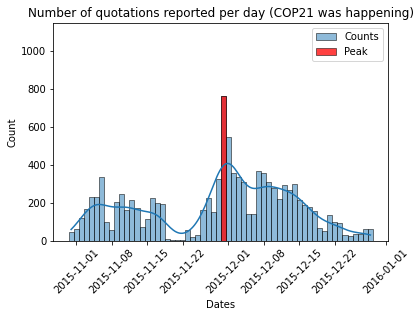

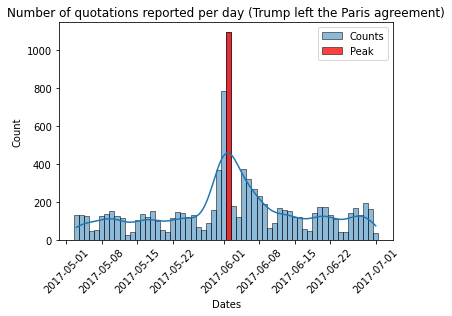

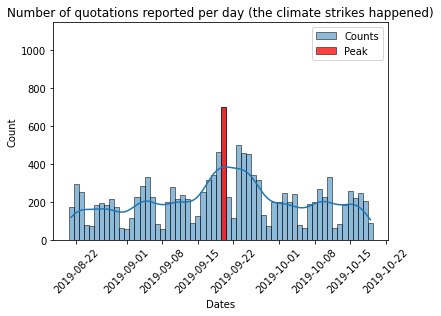

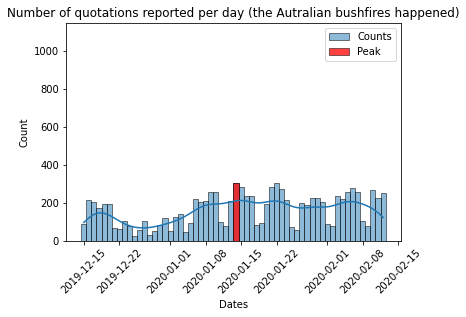

In [14]:
plot_all_events()
prop_res_pol()
prop_party()
prop_male_female()
covid_plot()

### Word cloud

#### Necessary imports

In [16]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/main/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#### Necessary utils

In [17]:
lexic = ['climate change', 'climate emergency', 'climate crisis', 'global warming', 'greenhouse effect',
        'fossil fuel', 'renewable energy', 'renewable energy', ' ha ']

def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))    
    return txt

def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    return lemmatized_output

#### Function to find the most common words for politicians and scientists

In [18]:
def most_common_words(quotes_all_years=quotes_all_years, lexic=lexic):
    research_speakers_quotes = quotes_all_years[(quotes_all_years.occupation.str.lower().str.contains('research', 'scienti').fillna(False))].quotation
    politician_speakers_quotes = quotes_all_years[(quotes_all_years.occupation.str.lower().str.contains('politician').fillna(False)  )].quotation

    politician_speakers_quotes = politician_speakers_quotes.apply(lambda x : preprocess(x))
    research_speakers_quotes = research_speakers_quotes.apply(lambda x : preprocess(x))

    politician_speakers_quotes = politician_speakers_quotes.apply(lambda x : lemmatize_text(x))
    research_speakers_quotes = research_speakers_quotes.apply(lambda x : lemmatize_text(x))

    politician_speakers_quotes = politician_speakers_quotes.apply(lambda x : ' '.join(x) )
    research_speakers_quotes = research_speakers_quotes.apply(lambda x : ' '.join(x))

    politician_speakers_quotes = ''.join(politician_speakers_quotes)
    research_speakers_quotes = ''.join(research_speakers_quotes)

    for w in lexic:
        politician_speakers_quotes = politician_speakers_quotes.replace(w, "")
        research_speakers_quotes = research_speakers_quotes.replace(w, "")

    return politician_speakers_quotes, research_speakers_quotes